In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
pip install pyclustering

     |████████████████████████████████| 2.6 MB 5.4 MB/s 
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-py3-none-any.whl size=2395121 sha256=922b718627b104897dfd170e729c9049bb3230cd1b16b3202c419be0edcc0408
  Stored in directory: /root/.cache/pip/wheels/ea/87/6b/1e0568b5ba9dc6518a25338bae90bd8392f35206bb90bb10f1
Successfully built pyclustering


In [ ]:
# Mounting the gdrive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Opening files.
more_data = pd.read_csv("/content/gdrive/MyDrive/Assignment3_Dataset/more_than_50k.csv")
pop_path = pd.read_csv("/content/gdrive/MyDrive/Assignment3_Dataset/population.csv")
data_path = pd.read_csv("/content/gdrive/MyDrive/Assignment3_Dataset/Dataset Description.csv")

In [130]:
# Checking the dataset description
data_path

,Column Code,Distict Values,Column,Type
0,AAGE,91,age,numerical
1,ACLSWKR,9,class of worker,categorical
2,ADTIND,52,industry code,categorical
3,ADTOCC,47,occupation code,categorical
4,AHGA,17,education,categorical
5,AHRSPAY,1240,wage per hour,numerical
6,AHSCOL,3,enrolled in edu inst last wk,categorical
7,AMARITL,7,marital status,categorical
8,AMJIND,24,major industry code,categorical
9,AMJOCC,15,major occupation code,categorical


## Population Dataset


In [ ]:
# Preprocessing 
# Replacing the Missing ? data (1.1)
pop_path.replace(" ?", np.nan, inplace = True)
pop_path.head()

,AAGE,ACLSWKR,ADTIND,ADTOCC,AHGA,AHRSPAY,AHSCOL,AMARITL,AMJIND,AMJOCC,ARACE,AREORGN,ASEX,AUNMEM,AUNTYPE,AWKSTAT,CAPGAIN,CAPLOSS,DIVVAL,FILESTAT,GRINREG,GRINST,HHDFMX,HHDREL,MIGMTR1,MIGMTR3,MIGMTR4,MIGSAME,MIGSUN,NOEMP,PARENT,PEFNTVTY,PEMNTVTY,PENATVTY,PRCITSHP,SEOTR,VETQVA,VETYN,WKSWORK,YEAR
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Not in labor force,0,0,0,Nonfiler,Not in universe,Not in universe,Other Rel 18+ ever marr not in subfamily,Other relative of householder,NaN,NaN,NaN,Not in universe under 1 year old,NaN,0,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,White,All other,Male,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Head of household,South,Arkansas,Householder,Householder,MSA to MSA,Same county,Same county,No,Yes,1,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,Asian or Pacific Islander,All other,Female,Not in universe,Not in universe,Not in labor force,0,0,0,Nonfiler,Not in universe,Not in universe,Child 18+ never marr Not in a subfamily,Child 18 or older,NaN,NaN,NaN,Not in universe under 1 year old,NaN,0,Not in universe,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,Nonmover,Nonmover,Nonmover,Yes,Not in universe,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,Nonmover,Nonmover,Nonmover,Yes,Not in universe,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94


In [ ]:
# Finding the percentage of missing value (1.2)
missing = pop_path.isnull().sum().sort_values(ascending = False)
percentageMissing = (missing/len(pop_path))*100
pd.concat([missing, percentageMissing], axis = 1, keys= ['Number of missing values ', 'Percentage of Missing Values'])
# Columns with the missing data over 40 % is MIGMTR1, MIGSUN, MIGMTR4, MIGMTR3

,Number of missing values,Percentage of Missing Values
MIGMTR1,99696,49.967172
MIGSUN,99696,49.967172
MIGMTR4,99696,49.967172
MIGMTR3,99696,49.967172
PEFNTVTY,6713,3.364524
PEMNTVTY,6119,3.066814
PENATVTY,3393,1.700556
GRINST,708,0.354846
YEAR,0,0.000000
AUNMEM,0,0.000000


We will remove the four columns namely MIGMTR1, MIGSUN, MIGMTR4, MIGMTR3.

In [ ]:
popd1 = pop_path.drop(["MIGMTR1", "MIGSUN", "MIGMTR4", "MIGMTR3"] , axis = 1)
print(popd1.columns)
popd1.head()

Index(['AAGE', 'ACLSWKR', 'ADTIND', 'ADTOCC', 'AHGA', 'AHRSPAY', 'AHSCOL',
       'AMARITL', 'AMJIND', 'AMJOCC', 'ARACE', 'AREORGN', 'ASEX', 'AUNMEM',
       'AUNTYPE', 'AWKSTAT', 'CAPGAIN', 'CAPLOSS', 'DIVVAL', 'FILESTAT',
       'GRINREG', 'GRINST', 'HHDFMX', 'HHDREL', 'MIGSAME', 'NOEMP', 'PARENT',
       'PEFNTVTY', 'PEMNTVTY', 'PENATVTY', 'PRCITSHP', 'SEOTR', 'VETQVA',
       'VETYN', 'WKSWORK', 'YEAR'],
      dtype='object')


,AAGE,ACLSWKR,ADTIND,ADTOCC,AHGA,AHRSPAY,AHSCOL,AMARITL,AMJIND,AMJOCC,ARACE,AREORGN,ASEX,AUNMEM,AUNTYPE,AWKSTAT,CAPGAIN,CAPLOSS,DIVVAL,FILESTAT,GRINREG,GRINST,HHDFMX,HHDREL,MIGSAME,NOEMP,PARENT,PEFNTVTY,PEMNTVTY,PENATVTY,PRCITSHP,SEOTR,VETQVA,VETYN,WKSWORK,YEAR
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Not in labor force,0,0,0,Nonfiler,Not in universe,Not in universe,Other Rel 18+ ever marr not in subfamily,Other relative of householder,Not in universe under 1 year old,0,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,White,All other,Male,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Head of household,South,Arkansas,Householder,Householder,No,1,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,Asian or Pacific Islander,All other,Female,Not in universe,Not in universe,Not in labor force,0,0,0,Nonfiler,Not in universe,Not in universe,Child 18+ never marr Not in a subfamily,Child 18 or older,Not in universe under 1 year old,0,Not in universe,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,Yes,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,Yes,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94


Feature Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcd3c435b50>,
      dtype=object)

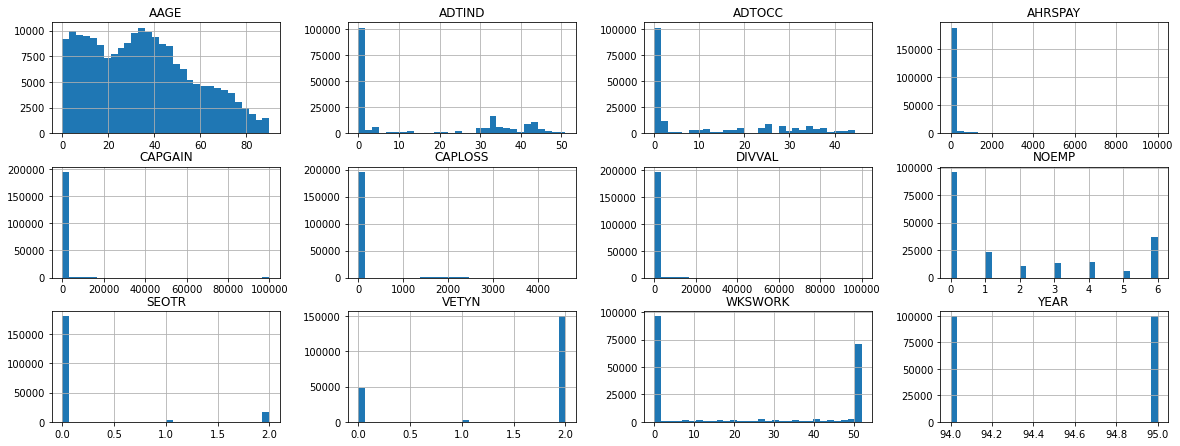

In [ ]:
popd1.hist(figsize=(20, 10), grid = True, layout=(4, 4), bins = 30)


In [ ]:

cat_cols = popd1.select_dtypes(exclude=["number"]).dtypes

cat_cols = ['ACLSWKR', 'AHGA', 'AHSCOL', 'AMARITL', 'AMJIND', 'AMJOCC', 'ARACE', 
            'AREORGN', 'ASEX', 'AUNMEM', 'AUNTYPE', 'AWKSTAT', 'FILESTAT', 'GRINREG', 
            'GRINST',  'HHDFMX',  'HHDREL',  'MIGSAME', 'PARENT',  'PEFNTVTY', 'PEMNTVTY', 'PENATVTY','PRCITSHP',
            'VETQVA']

The histogram for column ACLSWKR


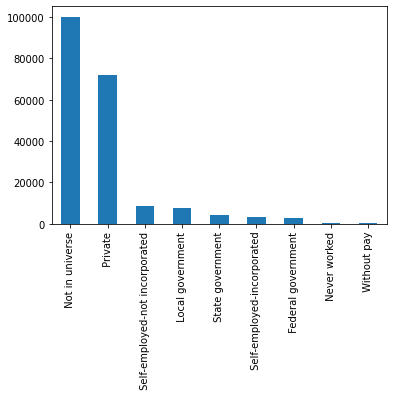


The histogram for column AHGA


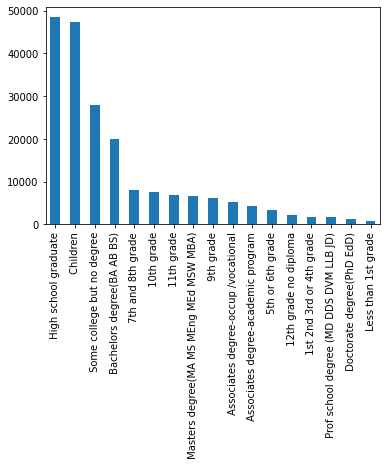


The histogram for column AHSCOL


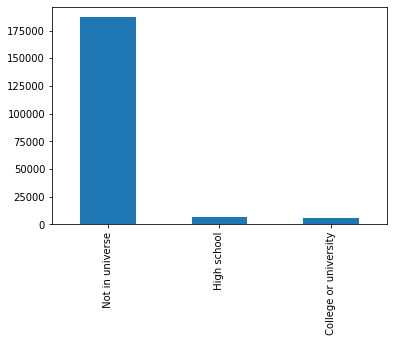


The histogram for column AMARITL


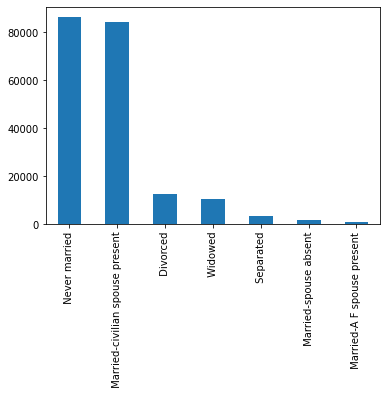


The histogram for column AMJIND


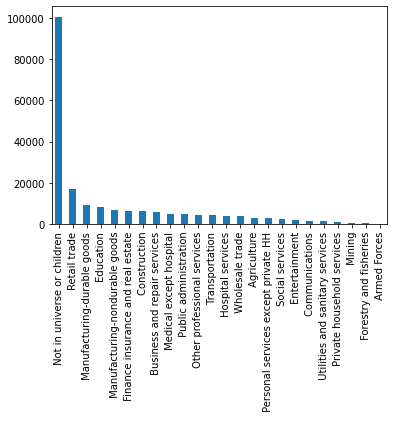


The histogram for column AMJOCC


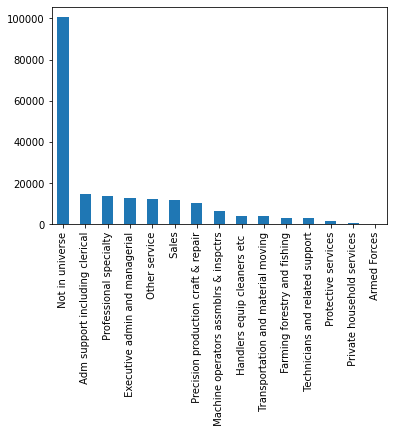


The histogram for column ARACE


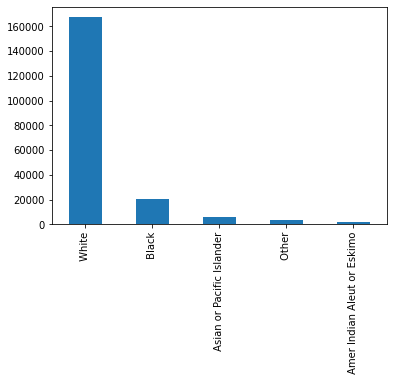


The histogram for column AREORGN


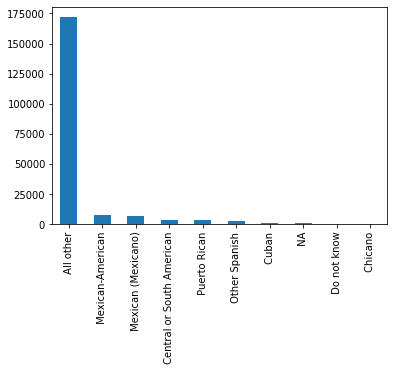


The histogram for column ASEX


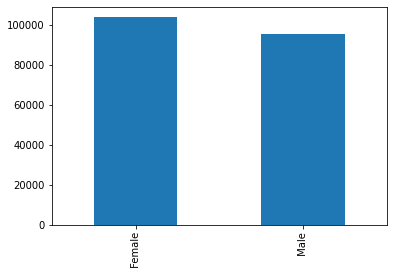


The histogram for column AUNMEM


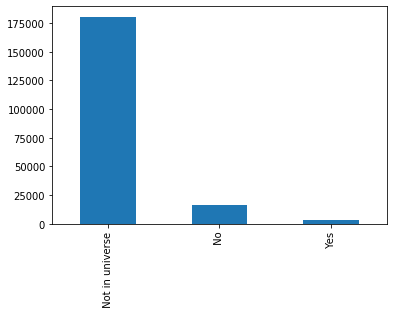


The histogram for column AUNTYPE


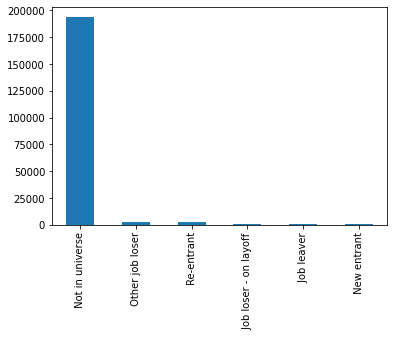


The histogram for column AWKSTAT


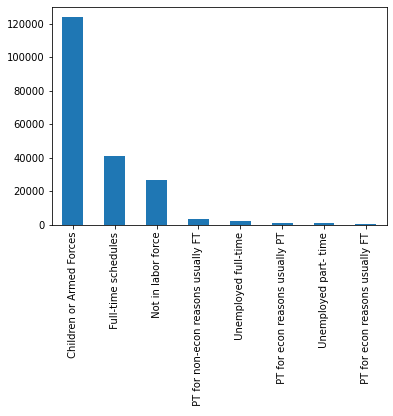


The histogram for column FILESTAT


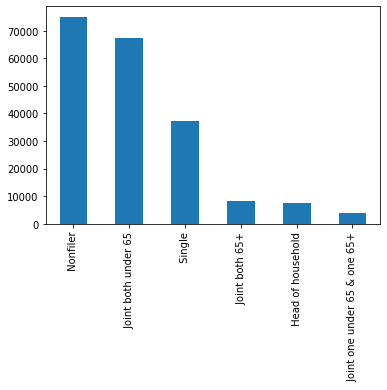


The histogram for column GRINREG


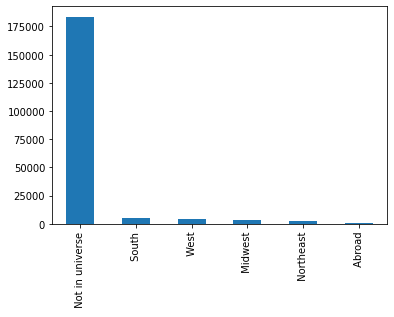


The histogram for column GRINST


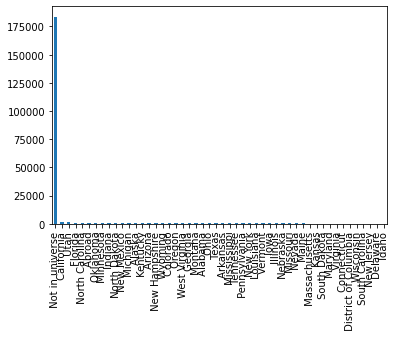


The histogram for column HHDFMX


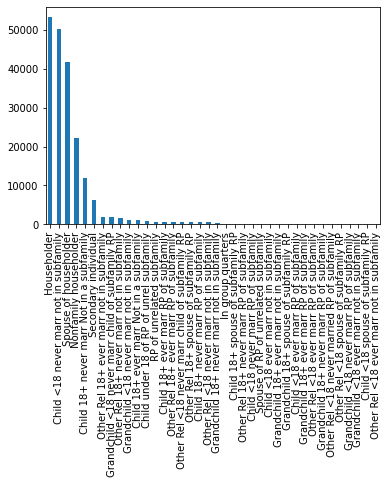


The histogram for column HHDREL


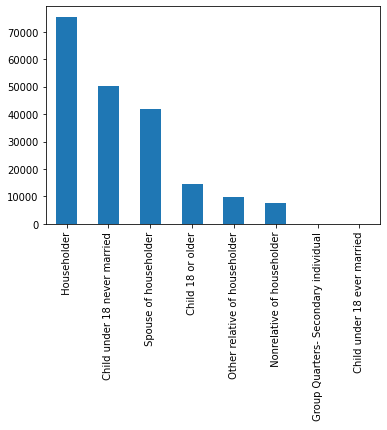


The histogram for column MIGSAME


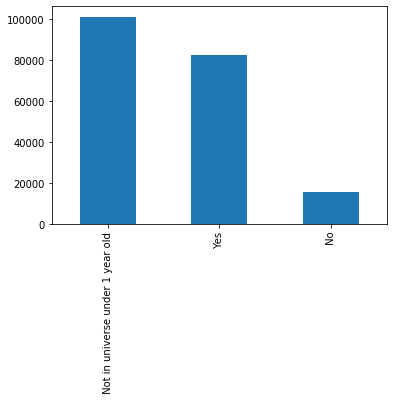


The histogram for column PARENT


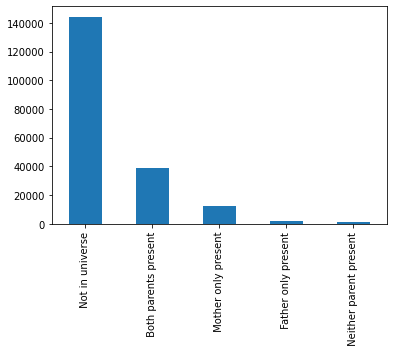


The histogram for column PEFNTVTY


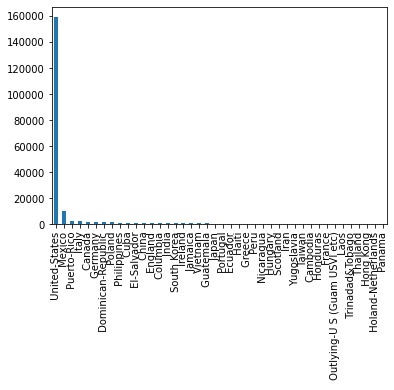


The histogram for column PEMNTVTY


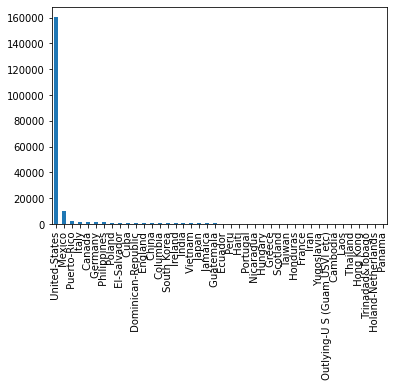


The histogram for column PENATVTY


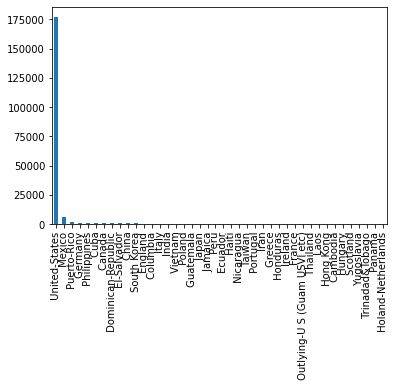


The histogram for column PRCITSHP


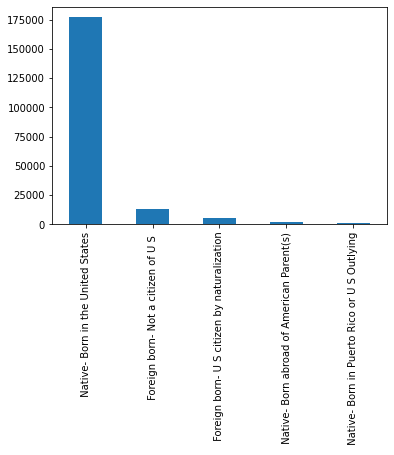


The histogram for column VETQVA


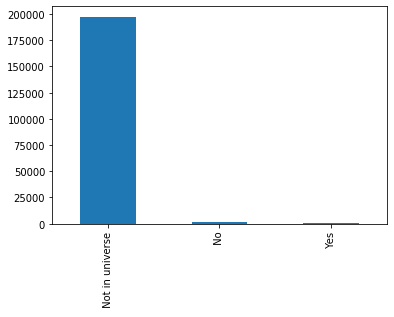

In [ ]:

from time import sleep
for col in cat_cols:
    
    print("The histogram for column", col)
    popd1[col].value_counts().plot(kind = "bar")
    plt.show()
    print()



The columns to drop: VETQVA, PRCITSHP, PENATVTY, PEMNTVTY, PEFNTVTY, GRINST, GRINREG, AUNTYPE, AUNMEM, AREORGN, ARACE, AMJOC, AMJIND, AHSCOL, ADTIND, ADTOCC, AHRSPAY, CAPGAIN, CAPLOSS, DIVYAL, NOEMP, SEOTR, YEAR

In [ ]:
popd2 = popd1.drop(['VETQVA', 'PRCITSHP', 'PENATVTY', 'PEMNTVTY', 'PEFNTVTY', 'GRINST', 'GRINREG', 'AUNTYPE', 'AUNMEM', 'AREORGN', 'ARACE', 'AMJOCC', 'AMJIND', 'AHSCOL', 'ADTIND', 'ADTOCC', 'AHRSPAY', 'CAPGAIN', 'CAPLOSS', 'DIVVAL', 'NOEMP', 'SEOTR', 'YEAR', 'WKSWORK', 'VETYN'] , axis = 1)
print(len(popd2.columns))
popd2.head()

11


,AAGE,ACLSWKR,AHGA,AMARITL,ASEX,AWKSTAT,FILESTAT,HHDFMX,HHDREL,MIGSAME,PARENT
0,73,Not in universe,High school graduate,Widowed,Female,Not in labor force,Nonfiler,Other Rel 18+ ever marr not in subfamily,Other relative of householder,Not in universe under 1 year old,Not in universe
1,58,Self-employed-not incorporated,Some college but no degree,Divorced,Male,Children or Armed Forces,Head of household,Householder,Householder,No,Not in universe
2,18,Not in universe,10th grade,Never married,Female,Not in labor force,Nonfiler,Child 18+ never marr Not in a subfamily,Child 18 or older,Not in universe under 1 year old,Not in universe
3,9,Not in universe,Children,Never married,Female,Children or Armed Forces,Nonfiler,Child <18 never marr not in subfamily,Child under 18 never married,Yes,Both parents present
4,10,Not in universe,Children,Never married,Female,Children or Armed Forces,Nonfiler,Child <18 never marr not in subfamily,Child under 18 never married,Yes,Both parents present


In [ ]:
mode_dct = {}
for column in popd2.columns:
    mode_dct[column] = popd2[column].mode()[0]

for column in popd2.columns:
    popd2[column].fillna(mode_dct[column], inplace=True)

In [ ]:
# Binning of numerical columns: AAGE
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
popd2['AAGE'] = np.searchsorted(bins, popd2['AAGE'].values)
popd2.head()

,AAGE,ACLSWKR,AHGA,AMARITL,ASEX,AWKSTAT,FILESTAT,HHDFMX,HHDREL,MIGSAME,PARENT
0,8,Not in universe,High school graduate,Widowed,Female,Not in labor force,Nonfiler,Other Rel 18+ ever marr not in subfamily,Other relative of householder,Not in universe under 1 year old,Not in universe
1,6,Self-employed-not incorporated,Some college but no degree,Divorced,Male,Children or Armed Forces,Head of household,Householder,Householder,No,Not in universe
2,2,Not in universe,10th grade,Never married,Female,Not in labor force,Nonfiler,Child 18+ never marr Not in a subfamily,Child 18 or older,Not in universe under 1 year old,Not in universe
3,1,Not in universe,Children,Never married,Female,Children or Armed Forces,Nonfiler,Child <18 never marr not in subfamily,Child under 18 never married,Yes,Both parents present
4,1,Not in universe,Children,Never married,Female,Children or Armed Forces,Nonfiler,Child <18 never marr not in subfamily,Child under 18 never married,Yes,Both parents present


In [ ]:
# One Hot Encodding
popd3 = popd2.copy(deep = True)
for col in popd2.columns:
    one_hot = pd.get_dummies(popd2[col])
    popd3 = popd3.drop(col, axis = 1)
    popd3 = popd3.join(one_hot, lsuffix="_" + col)

popd3.head()

,0,1,2,3,4,5,6,7,8,9,Federal government,Local government,Never worked,Not in universe_PARENT,Private,Self-employed-incorporated,Self-employed-not incorporated,State government,Without pay,10th grade,11th grade,12th grade no diploma,1st 2nd 3rd or 4th grade,5th or 6th grade,7th and 8th grade,9th grade,Associates degree-academic program,Associates degree-occup /vocational,Bachelors degree(BA AB BS),Children,Doctorate degree(PhD EdD),High school graduate,Less than 1st grade,Masters degree(MA MS MEng MEd MSW MBA),Prof school degree (MD DDS DVM LLB JD),Some college but no degree,Divorced,Married-A F spouse present,Married-civilian spouse present,Married-spouse absent,...,Grandchild 18+ never marr not in subfamily,Grandchild 18+ spouse of subfamily RP,Grandchild <18 ever marr not in subfamily,Grandchild <18 never marr RP of subfamily,Grandchild <18 never marr child of subfamily RP,Grandchild <18 never marr not in subfamily,Householder_HHDREL,In group quarters,Nonfamily householder,Other Rel 18+ ever marr RP of subfamily,Other Rel 18+ ever marr not in subfamily,Other Rel 18+ never marr RP of subfamily,Other Rel 18+ never marr not in subfamily,Other Rel 18+ spouse of subfamily RP,Other Rel <18 ever marr RP of subfamily,Other Rel <18 ever marr not in subfamily,Other Rel <18 never marr child of subfamily RP,Other Rel <18 never marr not in subfamily,Other Rel <18 never married RP of subfamily,Other Rel <18 spouse of subfamily RP,RP of unrelated subfamily,Secondary individual,Spouse of RP of unrelated subfamily,Spouse of householder_HHDREL,Child 18 or older,Child under 18 ever married,Child under 18 never married,Group Quarters- Secondary individual,Householder,Nonrelative of householder,Other relative of householder,Spouse of householder,No,Not in universe under 1 year old,Yes,Both parents present,Father only present,Mother only present,Neither parent present,Not in universe
0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0


In [ ]:
# Fitting PCA
from sklearn.decomposition import PCA

cum_var = []
comps = np.linspace(1, 100, num = 100, dtype=np.int64)

for comp in comps:
    X = popd3
    pca = PCA(n_components = comp)
    pca.fit_transform(X)
    cov = pca.explained_variance_ratio_
    cum_var.append(cov.sum())





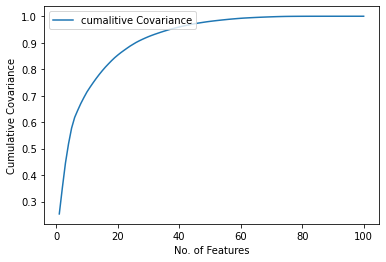

In [ ]:
plt.plot(list(comps), cum_var,  label = "cumalitive Covariance")
plt.legend(loc = "upper left")
plt.xlabel('No. of Features')
plt.ylabel('Cumulative Covariance')
plt.show()



In [ ]:
X = popd3

from sklearn.decomposition import PCA
pca_p1 = PCA(n_components = 20)
X_ = pca_p1.fit_transform(X)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
# Chosen Number of Features = 20 keeping the threshold of 0.85.
# pyclustering
from pyclustering.cluster.kmedians import kmedians
from random import sample

errors = []
clusters = list(range(10, 24))
for cluster in clusters:
    random_index = sample(range(0, X_.shape[0]), cluster)
    initial_medians = X_[random_index]
    k_medians = kmedians(X_, initial_medians)
    k_medians.process()
    errors.append(k_medians.get_total_wce()/cluster)
        

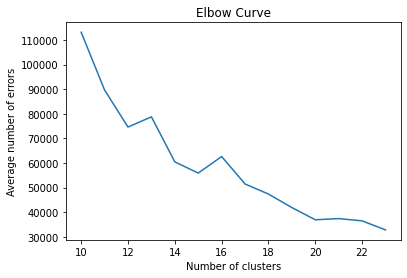

In [ ]:
plt.plot(clusters, errors)
plt.title("Elbow Curve")
plt.xlabel('Number of clusters')
plt.ylabel('Average number of errors')
plt.show()



In [ ]:
# Chosen Number of Clusters: Actual = 20                                                                                                                                                                                                                                                                                                                           , Since the question restrics the choice to only 10 to 24, in the absence of an elbow the number of clsuters are taken as 24
# Final Clusters 

from pyclustering.cluster.kmedians import kmedians
from random import sample

random_index = sample(range(0, X_.shape[0]), 20)
initial_medians = X_[random_index]              
k_medians = kmedians(X_, initial_medians)
y = k_medians.process()
    

In [ ]:
# Over 50K_pop
more_data.head()

,AAGE,ACLSWKR,ADTIND,ADTOCC,AHGA,AHRSPAY,AHSCOL,AMARITL,AMJIND,AMJOCC,ARACE,AREORGN,ASEX,AUNMEM,AUNTYPE,AWKSTAT,CAPGAIN,CAPLOSS,DIVVAL,FILESTAT,GRINREG,GRINST,HHDFMX,HHDREL,MIGMTR1,MIGMTR3,MIGMTR4,MIGSAME,MIGSUN,NOEMP,PARENT,PEFNTVTY,PEMNTVTY,PENATVTY,PRCITSHP,SEOTR,VETQVA,VETYN,WKSWORK,YEAR
0,57,Self-employed-incorporated,11,2,High school graduate,0,Not in universe,Married-civilian spouse present,Manufacturing-durable goods,Executive admin and managerial,White,All other,Male,Not in universe,Not in universe,Full-time schedules,0,0,500,Joint both under 65,Not in universe,Not in universe,Householder,Householder,?,?,?,Not in universe under 1 year old,?,2,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,95
1,44,Private,3,38,High school graduate,0,Not in universe,Married-civilian spouse present,Mining,Transportation and material moving,White,All other,Male,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Joint both under 65,Not in universe,Not in universe,Spouse of householder,Spouse of householder,Nonmover,Nonmover,Nonmover,Yes,Not in universe,4,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,No,1,48,94
2,54,Private,19,26,High school graduate,1550,Not in universe,Married-civilian spouse present,Manufacturing-nondurable goods,Adm support including clerical,White,All other,Male,Yes,Not in universe,Children or Armed Forces,0,0,0,Joint both under 65,Not in universe,Not in universe,Householder,Householder,Nonmover,Nonmover,Nonmover,Yes,Not in universe,6,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94
3,25,Private,33,2,9th grade,0,Not in universe,Never married,Retail trade,Executive admin and managerial,White,All other,Male,Not in universe,Not in universe,Full-time schedules,13550,0,200,Single,Not in universe,Not in universe,Other Rel 18+ never marr not in subfamily,Other relative of householder,?,?,?,Not in universe under 1 year old,?,2,Not in universe,United-States,United-States,United-States,Native- Born in the United States,1,Not in universe,2,52,95
4,26,Private,11,5,Bachelors degree(BA AB BS),0,Not in universe,Married-civilian spouse present,Manufacturing-durable goods,Professional specialty,White,All other,Female,Not in universe,Not in universe,Full-time schedules,0,0,100,Joint both under 65,Not in universe,Not in universe,Spouse of householder,Spouse of householder,?,?,?,Not in universe under 1 year old,?,6,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,95


In [ ]:
# Preprocessing 
# Replacing the Missing ? data (1.1)
more_data.replace(" ?", np.nan, inplace = True)
more_data.head()

,AAGE,ACLSWKR,ADTIND,ADTOCC,AHGA,AHRSPAY,AHSCOL,AMARITL,AMJIND,AMJOCC,ARACE,AREORGN,ASEX,AUNMEM,AUNTYPE,AWKSTAT,CAPGAIN,CAPLOSS,DIVVAL,FILESTAT,GRINREG,GRINST,HHDFMX,HHDREL,MIGMTR1,MIGMTR3,MIGMTR4,MIGSAME,MIGSUN,NOEMP,PARENT,PEFNTVTY,PEMNTVTY,PENATVTY,PRCITSHP,SEOTR,VETQVA,VETYN,WKSWORK,YEAR
0,57,Self-employed-incorporated,11,2,High school graduate,0,Not in universe,Married-civilian spouse present,Manufacturing-durable goods,Executive admin and managerial,White,All other,Male,Not in universe,Not in universe,Full-time schedules,0,0,500,Joint both under 65,Not in universe,Not in universe,Householder,Householder,NaN,NaN,NaN,Not in universe under 1 year old,NaN,2,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,95
1,44,Private,3,38,High school graduate,0,Not in universe,Married-civilian spouse present,Mining,Transportation and material moving,White,All other,Male,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Joint both under 65,Not in universe,Not in universe,Spouse of householder,Spouse of householder,Nonmover,Nonmover,Nonmover,Yes,Not in universe,4,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,No,1,48,94
2,54,Private,19,26,High school graduate,1550,Not in universe,Married-civilian spouse present,Manufacturing-nondurable goods,Adm support including clerical,White,All other,Male,Yes,Not in universe,Children or Armed Forces,0,0,0,Joint both under 65,Not in universe,Not in universe,Householder,Householder,Nonmover,Nonmover,Nonmover,Yes,Not in universe,6,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94
3,25,Private,33,2,9th grade,0,Not in universe,Never married,Retail trade,Executive admin and managerial,White,All other,Male,Not in universe,Not in universe,Full-time schedules,13550,0,200,Single,Not in universe,Not in universe,Other Rel 18+ never marr not in subfamily,Other relative of householder,NaN,NaN,NaN,Not in universe under 1 year old,NaN,2,Not in universe,United-States,United-States,United-States,Native- Born in the United States,1,Not in universe,2,52,95
4,26,Private,11,5,Bachelors degree(BA AB BS),0,Not in universe,Married-civilian spouse present,Manufacturing-durable goods,Professional specialty,White,All other,Female,Not in universe,Not in universe,Full-time schedules,0,0,100,Joint both under 65,Not in universe,Not in universe,Spouse of householder,Spouse of householder,NaN,NaN,NaN,Not in universe under 1 year old,NaN,6,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,95


In [ ]:
# Finding the percentage of missing value (1.2)
missing = more_data.isnull().sum().sort_values(ascending = False)
percentageMissing = (missing/len(more_data))*100
pd.concat([missing, percentageMissing], axis = 1, keys = ['Number of missing values ', 'Percentage of Missing Values'])
# Columns with the missing data over 40 % is MIGMTR1, MIGSUN, MIGMTR4, MIGMTR3

,Number of missing values,Percentage of Missing Values
MIGMTR1,1906,53.240223
MIGSUN,1906,53.240223
MIGMTR4,1906,53.240223
MIGMTR3,1906,53.240223
PEFNTVTY,162,4.525140
PEMNTVTY,134,3.743017
PENATVTY,93,2.597765
GRINST,14,0.391061
YEAR,0,0.000000
AUNMEM,0,0.000000


In [ ]:
mored1 = more_data.drop(["MIGMTR1", "MIGSUN", "MIGMTR4", "MIGMTR3"] , axis = 1)
print(mored1.columns)
mored1.head()


Index(['AAGE', 'ACLSWKR', 'ADTIND', 'ADTOCC', 'AHGA', 'AHRSPAY', 'AHSCOL',
       'AMARITL', 'AMJIND', 'AMJOCC', 'ARACE', 'AREORGN', 'ASEX', 'AUNMEM',
       'AUNTYPE', 'AWKSTAT', 'CAPGAIN', 'CAPLOSS', 'DIVVAL', 'FILESTAT',
       'GRINREG', 'GRINST', 'HHDFMX', 'HHDREL', 'MIGSAME', 'NOEMP', 'PARENT',
       'PEFNTVTY', 'PEMNTVTY', 'PENATVTY', 'PRCITSHP', 'SEOTR', 'VETQVA',
       'VETYN', 'WKSWORK', 'YEAR'],
      dtype='object')


,AAGE,ACLSWKR,ADTIND,ADTOCC,AHGA,AHRSPAY,AHSCOL,AMARITL,AMJIND,AMJOCC,ARACE,AREORGN,ASEX,AUNMEM,AUNTYPE,AWKSTAT,CAPGAIN,CAPLOSS,DIVVAL,FILESTAT,GRINREG,GRINST,HHDFMX,HHDREL,MIGSAME,NOEMP,PARENT,PEFNTVTY,PEMNTVTY,PENATVTY,PRCITSHP,SEOTR,VETQVA,VETYN,WKSWORK,YEAR
0,57,Self-employed-incorporated,11,2,High school graduate,0,Not in universe,Married-civilian spouse present,Manufacturing-durable goods,Executive admin and managerial,White,All other,Male,Not in universe,Not in universe,Full-time schedules,0,0,500,Joint both under 65,Not in universe,Not in universe,Householder,Householder,Not in universe under 1 year old,2,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,95
1,44,Private,3,38,High school graduate,0,Not in universe,Married-civilian spouse present,Mining,Transportation and material moving,White,All other,Male,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Joint both under 65,Not in universe,Not in universe,Spouse of householder,Spouse of householder,Yes,4,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,No,1,48,94
2,54,Private,19,26,High school graduate,1550,Not in universe,Married-civilian spouse present,Manufacturing-nondurable goods,Adm support including clerical,White,All other,Male,Yes,Not in universe,Children or Armed Forces,0,0,0,Joint both under 65,Not in universe,Not in universe,Householder,Householder,Yes,6,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94
3,25,Private,33,2,9th grade,0,Not in universe,Never married,Retail trade,Executive admin and managerial,White,All other,Male,Not in universe,Not in universe,Full-time schedules,13550,0,200,Single,Not in universe,Not in universe,Other Rel 18+ never marr not in subfamily,Other relative of householder,Not in universe under 1 year old,2,Not in universe,United-States,United-States,United-States,Native- Born in the United States,1,Not in universe,2,52,95
4,26,Private,11,5,Bachelors degree(BA AB BS),0,Not in universe,Married-civilian spouse present,Manufacturing-durable goods,Professional specialty,White,All other,Female,Not in universe,Not in universe,Full-time schedules,0,0,100,Joint both under 65,Not in universe,Not in universe,Spouse of householder,Spouse of householder,Not in universe under 1 year old,6,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,95


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f564f62fb10>,
      dtype=object)

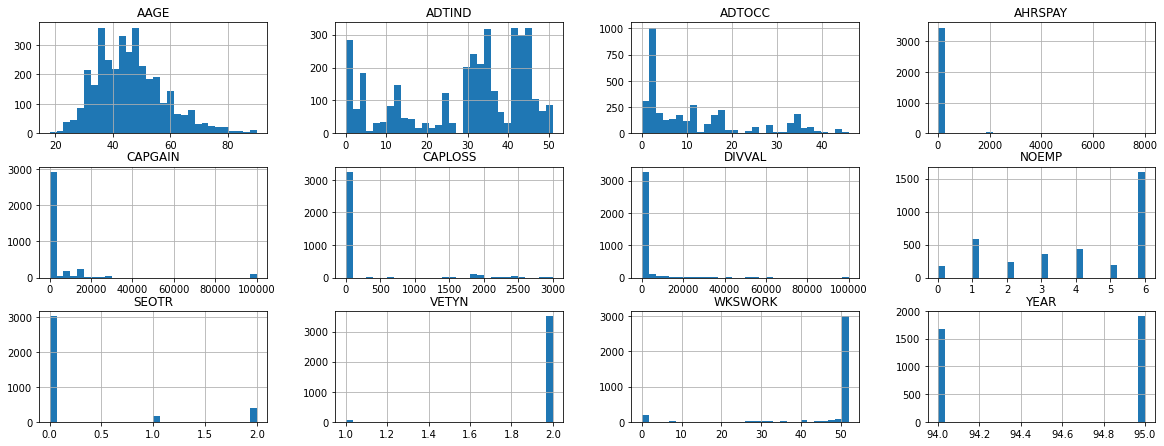

In [ ]:
mored1.hist(figsize=(20, 10), grid = True, layout=(4, 4), bins = 30)

The histogram for column ACLSWKR


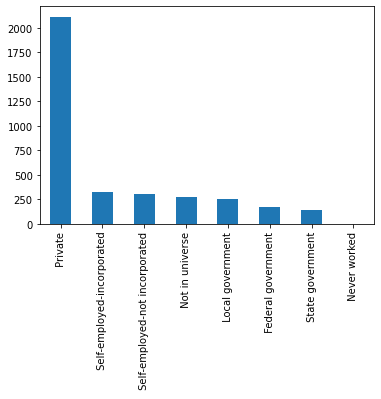


The histogram for column AHGA


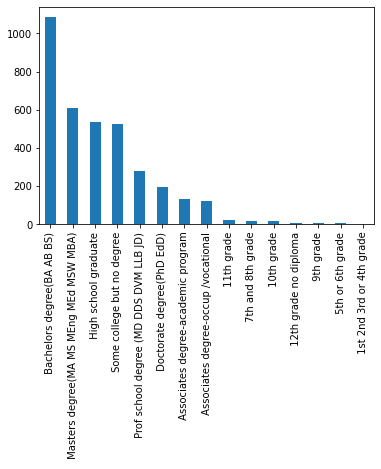


The histogram for column AHSCOL


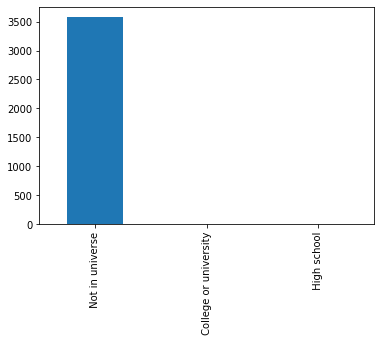


The histogram for column AMARITL


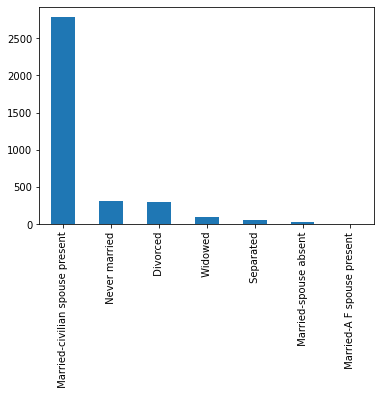


The histogram for column AMJIND


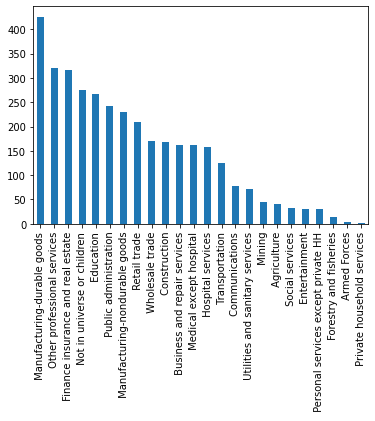


The histogram for column AMJOCC


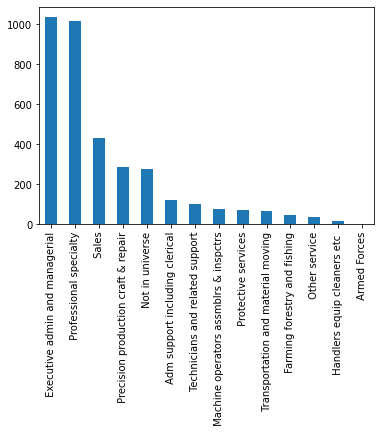


The histogram for column ARACE


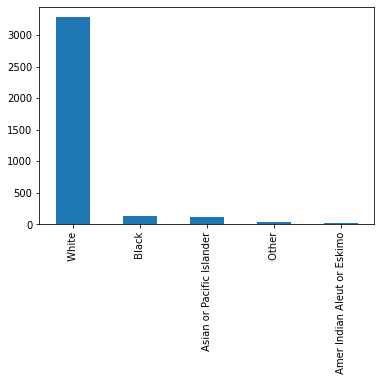


The histogram for column AREORGN


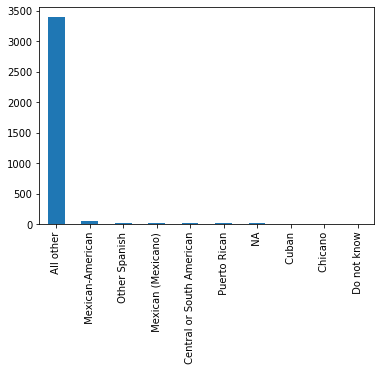


The histogram for column ASEX


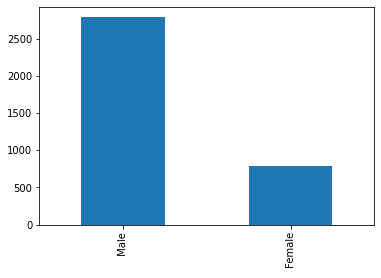


The histogram for column AUNMEM


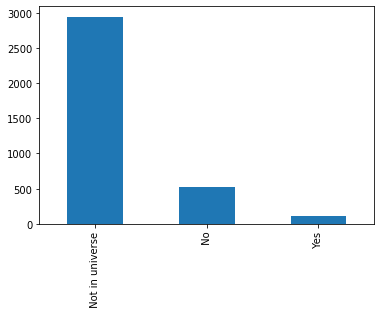


The histogram for column AUNTYPE


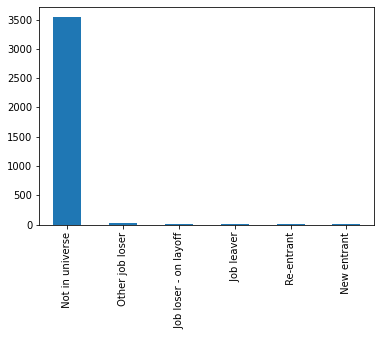


The histogram for column AWKSTAT


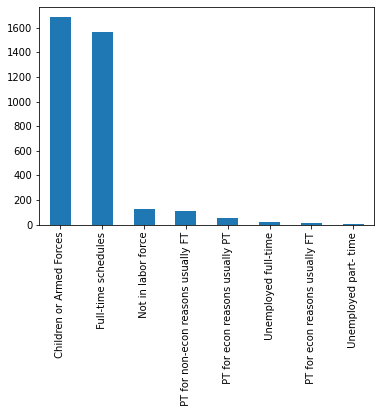


The histogram for column FILESTAT


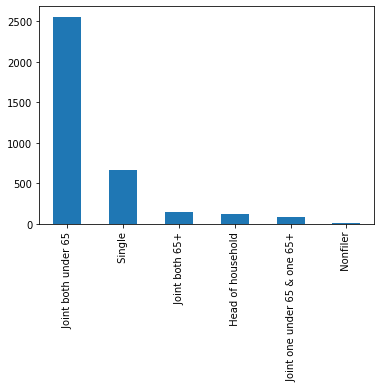


The histogram for column GRINREG


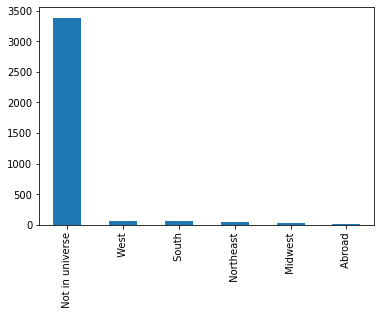


The histogram for column GRINST


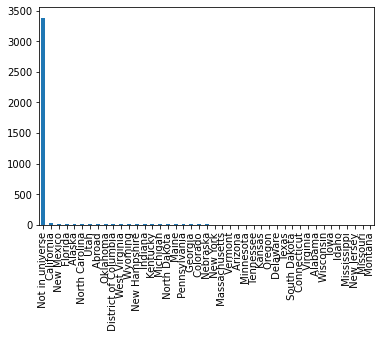


The histogram for column HHDFMX


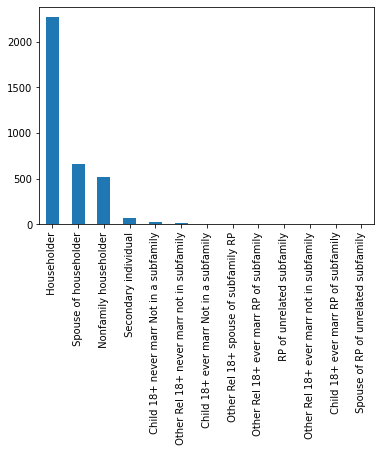


The histogram for column HHDREL


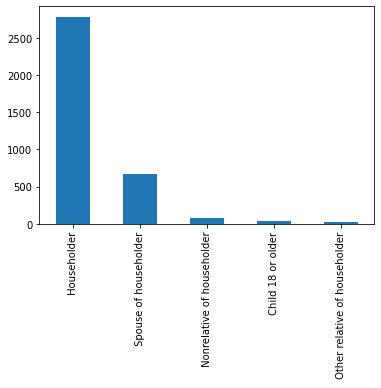


The histogram for column MIGSAME


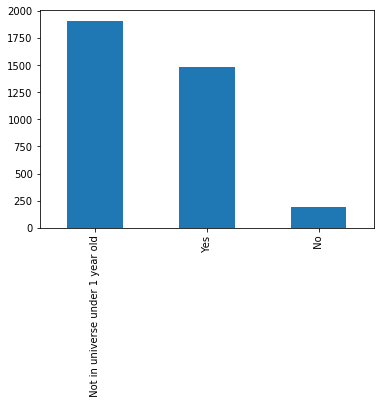


The histogram for column PARENT


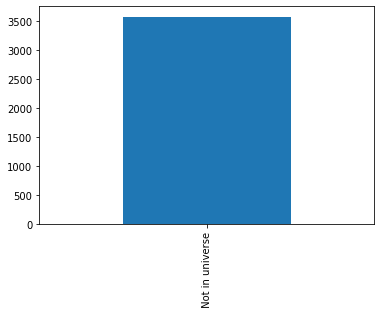


The histogram for column PEFNTVTY


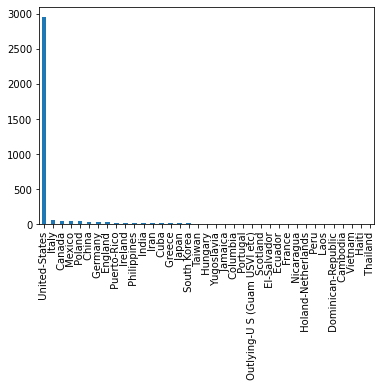


The histogram for column PEMNTVTY


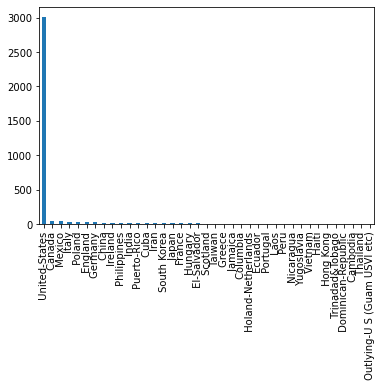


The histogram for column PENATVTY


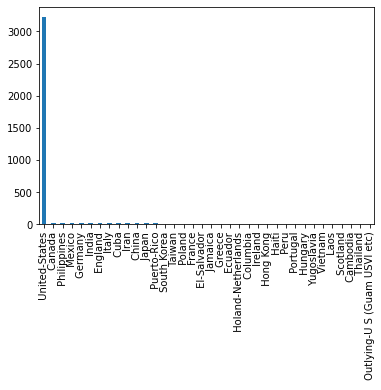


The histogram for column PRCITSHP


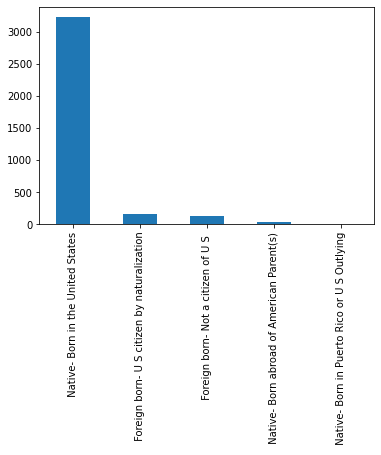


The histogram for column VETQVA


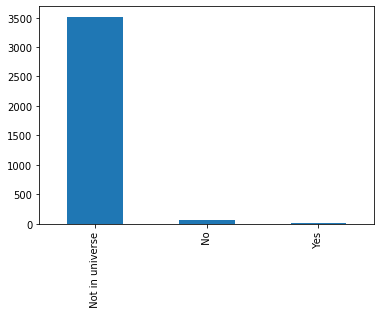

In [ ]:
cat_cols_more = mored1.select_dtypes(exclude=["number"]).dtypes

cat_cols_more = ['ACLSWKR', 'AHGA', 'AHSCOL', 'AMARITL', 'AMJIND', 'AMJOCC', 'ARACE', 
            'AREORGN', 'ASEX', 'AUNMEM', 'AUNTYPE', 'AWKSTAT', 'FILESTAT', 'GRINREG', 
            'GRINST',  'HHDFMX',  'HHDREL',  'MIGSAME', 'PARENT',  'PEFNTVTY', 'PEMNTVTY', 'PENATVTY','PRCITSHP',
            'VETQVA']

for col in cat_cols_more:    
    print("The histogram for column", col)
    mored1[col].value_counts().plot(kind = "bar")
    plt.show()
    print()



In [ ]:
mored2 = mored1.drop(['VETQVA', 'PRCITSHP', 'PENATVTY', 'PEMNTVTY', 'PEFNTVTY', 'PARENT', 'HHDREL', 'HHDFMX', 'GRINST', 'GRINREG', 'FILESTAT', 'AUNTYPE', 'AUNMEM', 'AREORGN', 'ARACE', 'AMARITL', 'AHSCOL', 'ACLSWKR', 'AHRSPAY', 'CAPGAIN', 'CAPLOSS', 'DIVVAL', 'NOEMP', 'SEOTR', 'YEAR', 'WKSWORK', 'VETYN'] , axis = 1)
print(len(mored2.columns))
mored2.head()

9


,AAGE,ADTIND,ADTOCC,AHGA,AMJIND,AMJOCC,ASEX,AWKSTAT,MIGSAME
0,57,11,2,High school graduate,Manufacturing-durable goods,Executive admin and managerial,Male,Full-time schedules,Not in universe under 1 year old
1,44,3,38,High school graduate,Mining,Transportation and material moving,Male,Children or Armed Forces,Yes
2,54,19,26,High school graduate,Manufacturing-nondurable goods,Adm support including clerical,Male,Children or Armed Forces,Yes
3,25,33,2,9th grade,Retail trade,Executive admin and managerial,Male,Full-time schedules,Not in universe under 1 year old
4,26,11,5,Bachelors degree(BA AB BS),Manufacturing-durable goods,Professional specialty,Female,Full-time schedules,Not in universe under 1 year old


In [ ]:
for column in mored2.columns:
    if (column in mode_dct.keys()):
        mored2[column].fillna(mode_dct[column], inplace=True)
    else:
        mode_dct[column] = mored2[column].mode()[0]
        mored2[column].fillna(mode_dct[column], inplace=True)

In [ ]:
cat_cols_more = mored2.select_dtypes(include=["number"]).dtypes
cat_cols_more

AAGE      int64
ADTIND    int64
ADTOCC    int64
dtype: object

In [ ]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
mored2['AAGE'] = np.searchsorted(bins, mored2['AAGE'].values)
mored2.head()

bins = [0, 10, 20, 30, 40, 50]
mored2['ADTIND'] = np.searchsorted(bins, mored2['ADTIND'].values)
mored2.head()

bins = [0, 10, 20, 30, 40, 50]
mored2['ADTOCC'] = np.searchsorted(bins, mored2['ADTOCC'].values)
mored2.head()

,AAGE,ADTIND,ADTOCC,AHGA,AMJIND,AMJOCC,ASEX,AWKSTAT,MIGSAME
0,6,2,1,High school graduate,Manufacturing-durable goods,Executive admin and managerial,Male,Full-time schedules,Not in universe under 1 year old
1,5,1,4,High school graduate,Mining,Transportation and material moving,Male,Children or Armed Forces,Yes
2,6,2,3,High school graduate,Manufacturing-nondurable goods,Adm support including clerical,Male,Children or Armed Forces,Yes
3,3,4,1,9th grade,Retail trade,Executive admin and managerial,Male,Full-time schedules,Not in universe under 1 year old
4,3,2,1,Bachelors degree(BA AB BS),Manufacturing-durable goods,Professional specialty,Female,Full-time schedules,Not in universe under 1 year old


In [ ]:
# One Hot Encodding
mored3 = mored2.copy(deep = True)
for col in mored2.columns:
    one_hot = pd.get_dummies(mored2[col])
    mored3 = mored3.drop(col, axis = 1)
    mored3 = mored3.join(one_hot, lsuffix = "_" + col)

mored3.head()

,2_ADTIND,3_ADTIND,4_ADTIND,5_ADTIND,6_ADTIND,7,8,9,0_ADTOCC,1_ADTOCC,2,3,4,5,6,0,1,2,3,4,5,10th grade,11th grade,12th grade no diploma,1st 2nd 3rd or 4th grade,5th or 6th grade,7th and 8th grade,9th grade,Associates degree-academic program,Associates degree-occup /vocational,Bachelors degree(BA AB BS),Doctorate degree(PhD EdD),High school graduate,Masters degree(MA MS MEng MEd MSW MBA),Prof school degree (MD DDS DVM LLB JD),Some college but no degree,Agriculture,Armed Forces_AMJOCC,Business and repair services,Communications,...,Manufacturing-nondurable goods,Medical except hospital,Mining,Not in universe or children,Other professional services,Personal services except private HH,Private household services,Public administration,Retail trade,Social services,Transportation,Utilities and sanitary services,Wholesale trade,Adm support including clerical,Armed Forces,Executive admin and managerial,Farming forestry and fishing,Handlers equip cleaners etc,Machine operators assmblrs & inspctrs,Not in universe,Other service,Precision production craft & repair,Professional specialty,Protective services,Sales,Technicians and related support,Transportation and material moving,Female,Male,Children or Armed Forces,Full-time schedules,Not in labor force,PT for econ reasons usually FT,PT for econ reasons usually PT,PT for non-econ reasons usually FT,Unemployed full-time,Unemployed part- time,No,Not in universe under 1 year old,Yes
0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0
1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0


In [ ]:
Xm = mored3

from sklearn.decomposition import PCA
pca_m1 = PCA(n_components = 20)
Xm_ = pca_m1.fit_transform(Xm)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
random_index = sample(range(0, Xm_.shape[0]), 20)
initial_medians = y.get_medians()            
k_medians_ = kmedians(Xm_, initial_medians)
ym = k_medians_.process()

In [ ]:
# Analysis
moreLabels = [0]*Xm_.shape[0]
cluster_m = ym.get_clusters()
for i in range(len(cluster_m)):
    for j in range(len(cluster_m[i])):
        moreLabels[cluster_m[i][j]] =  i

moreLabels = np.array(moreLabels)

cluster_sizes_m = []
for clus_num in range(20):
    cluster_sizes_m.append(mored3[moreLabels == clus_num].shape[0])

cluster_sizes_m = np.array(cluster_sizes_m)
    

percentageCluster = (cluster_sizes_m/len(mored3))*100
clusterm = pd.DataFrame({'Cluster Size ': cluster_sizes_m, 'Percentage of Values in Each Cluster': percentageCluster})
clusterm

,Cluster Size,Percentage of Values in Each Cluster
0,136,3.798883
1,246,6.871508
2,158,4.413408
3,128,3.575419
4,67,1.871508
5,218,6.089385
6,55,1.536313
7,155,4.329609
8,73,2.039106
9,385,10.754190


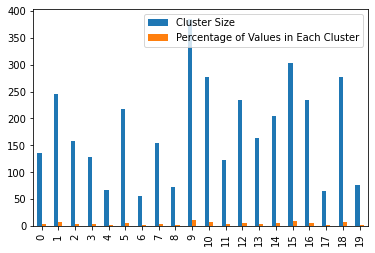

In [ ]:
clusterm.plot.bar()

In [ ]:
# Analysis
popLabels = [0]*X_.shape[0]
cluster_p = y.get_clusters()
for i in range(len(cluster_p)):
    for j in range(len(cluster_p[i])):
        popLabels[cluster_p[i][j]] =  i

popLabels = np.array(popLabels)

cluster_sizes_p = []
for clus_num in range(20):
    cluster_sizes_p.append(popd3[popLabels == clus_num].shape[0])

cluster_sizes_p = np.array(cluster_sizes_p)
    

percentageCluster_p = (cluster_sizes_p/len(popd3))*100
clusterp = pd.DataFrame({'Cluster Size ': cluster_sizes_p, 'Percentage of Values in Each Cluster': percentageCluster_p})
clusterp


,Cluster Size,Percentage of Values in Each Cluster
0,6041,3.027721
1,7349,3.683285
2,23858,11.957519
3,14510,7.272345
4,12417,6.223343
5,8801,4.411020
6,8048,4.033620
7,8105,4.062188
8,10663,5.344246
9,8270,4.144886


In [ ]:
clusterpm = pd.DataFrame({'Percentage of Values in Each Cluster population': percentageCluster_p, 'Percentage of Values in Each Cluster more than 50': percentageCluster})


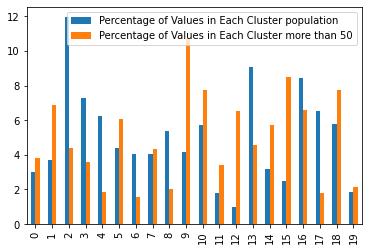

In [ ]:
clusterpm.plot.bar()

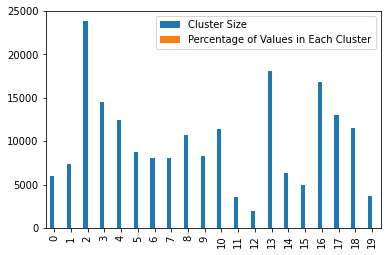

In [ ]:
clusterp.plot.bar()

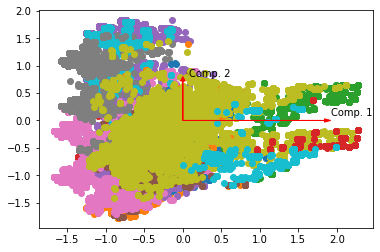

In [ ]:
# Plotting clusters for population data.
popLabels = np.array(popLabels)


from sklearn.decomposition import PCA
ax = plt.figure().gca()


pca_p2 = PCA(n_components = 2)
Xrp = pca_p2.fit_transform(X_)

for i in range(20):
    plt.scatter(Xrp[popLabels == i][:, 0] , Xrp[popLabels == i][:, 1] , color = "C" + str(i))

transf_components = pca_p2.transform(pca_p2.components_)

for i, (var, c) in enumerate(zip(pca_p2.explained_variance_, transf_components)):
    # The scaling of the transformed components for the purpose of visualization
    c = var * (c / np.linalg.norm(c))    
    ax.arrow(0, 0, c[0], c[1], head_width=0.06, head_length=0.08, fc='r', ec='r')
    ax.annotate('Comp. {0}'.format(i+1), xy=c+.08)

plt.show()





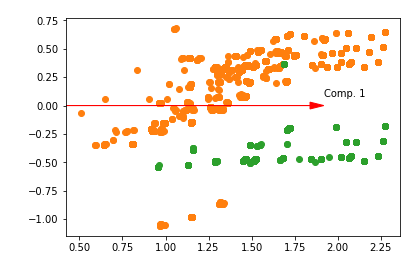

In [ ]:
# Overrepresented clusters
ax = plt.figure().gca()

plt.scatter(Xrp[popLabels == 2][:, 0] , Xrp[popLabels == 2][:, 1] , color = "C1")
plt.scatter(Xrp[popLabels == 13][:, 0] , Xrp[popLabels == 13][:, 1] , color = "C2")


transf_components = pca_p2.transform(pca_p2.components_)


for i, (var, c) in enumerate(zip(pca_p2.explained_variance_, transf_components)):
    # The scaling of the transformed components for the purpose of visualization
    c = var * (c / np.linalg.norm(c))    
    ax.arrow(0, 0, c[0], c[1], head_width=0.06, head_length=0.08, fc='r', ec='r')
    ax.annotate('Comp. {0}'.format(i+1), xy=c+.08)

plt.show()



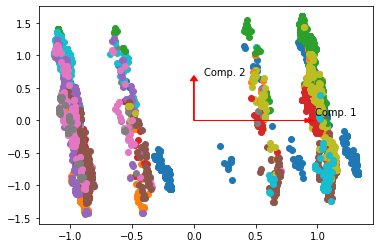

In [ ]:
# Plotting clusters for population data.
moreLabels = np.array(moreLabels)
from sklearn.decomposition import PCA
ax = plt.figure().gca()

pca_m2 = PCA(n_components = 2)
Xrm = pca_m2.fit_transform(Xm_)

for i in range(20):
    plt.scatter(Xrm[moreLabels == i][:, 0] , Xrm[moreLabels == i][:, 1] , color = "C" + str(i))

transf_components = pca_m2.transform(pca_m2.components_)

for i, (var, c) in enumerate(zip(pca_m2.explained_variance_, transf_components)):
    # The scaling of the transformed components for the purpose of visualization
    c = var * (c / np.linalg.norm(c))    
    ax.arrow(0, 0, c[0], c[1], head_width=0.06, head_length=0.08, fc='r', ec='r')
    ax.annotate('Comp. {0}'.format(i+1), xy=c+.08)

plt.show()


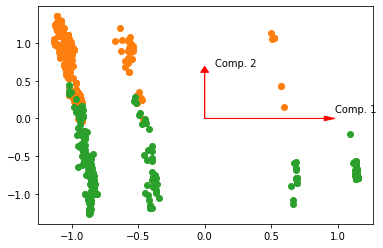

In [ ]:
ax = plt.figure().gca()

plt.scatter(Xrm[moreLabels == 9][:, 0] , Xrm[moreLabels == 9][:, 1] , color = "C1")
plt.scatter(Xrm[moreLabels == 15][:, 0] , Xrm[moreLabels == 15][:, 1] , color = "C2")

transf_components = pca_m2.transform(pca_m2.components_)

for i, (var, c) in enumerate(zip(pca_m2.explained_variance_, transf_components)):
    # The scaling of the transformed components for the purpose of visualization
    c = var * (c / np.linalg.norm(c))    
    ax.arrow(0, 0, c[0], c[1], head_width=0.06, head_length=0.08, fc='r', ec='r')
    ax.annotate('Comp. {0}'.format(i+1), xy=c+.08)

plt.show()



In [ ]:
# Inverse Transformation
# For the centroids of cluster 9 and 15
cents_m = pca_m1.inverse_transform(ym.get_medians())
cent_m_9 = cents_m[9]
cent_m_15 = cents_m[15]


cents_p = pca_p1.inverse_transform(y.get_medians())
cent_p_2 = cents_p[2]
cent_p_13 = cents_p[13]

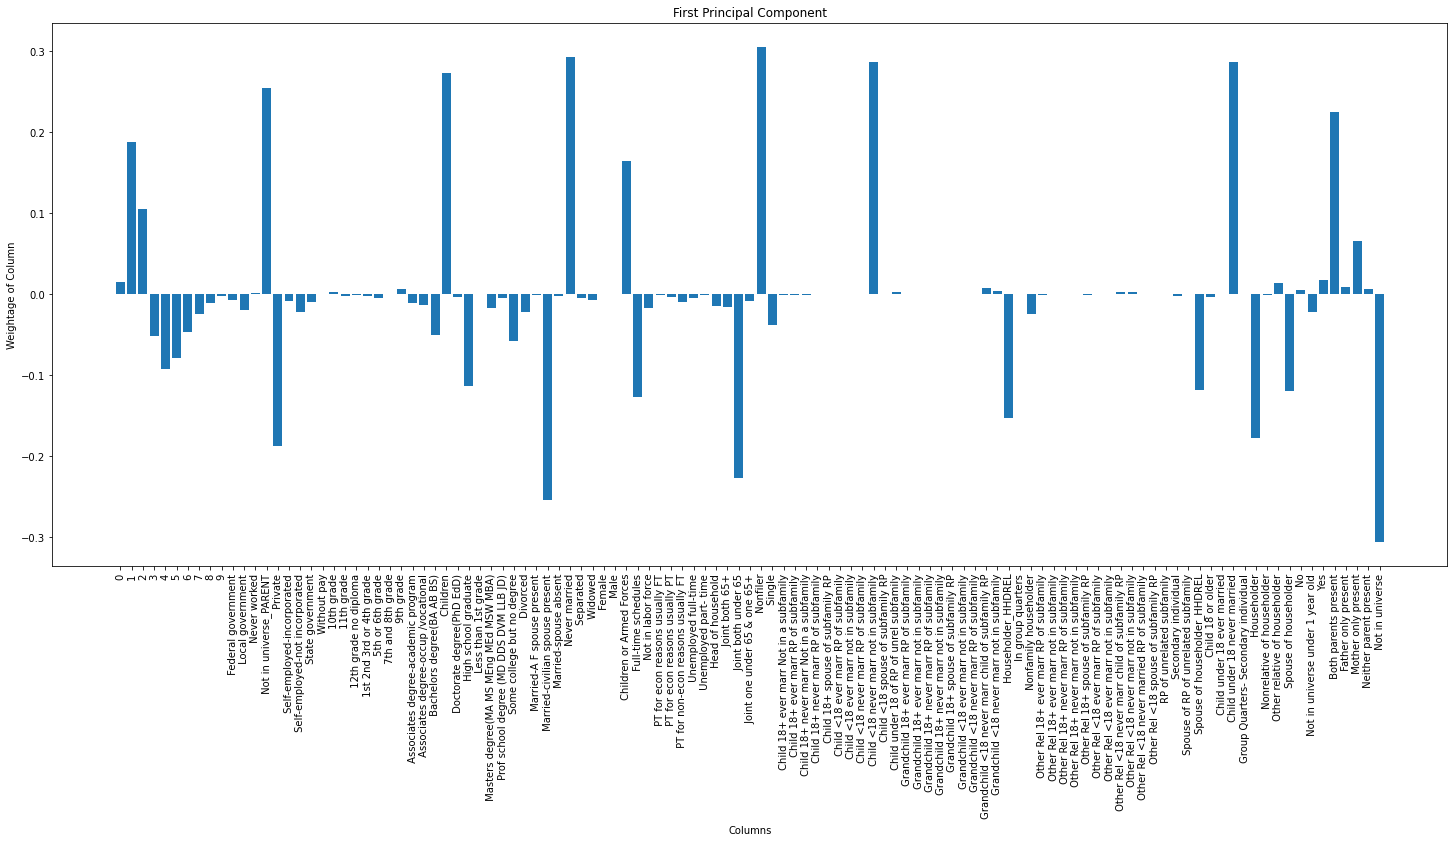

In [ ]:
# Plotting 1st principal component for PCA for population dataset
c1_p1 = pca_p1.components_[0]


plt.figure(figsize=(25, 10))
plt.bar(list(range(len(c1_p1))), c1_p1)
plt.title("First Principal Component")
plt.xticks(list(range(len(c1_p1))), popd3.columns, rotation='vertical')
plt.xlabel('Columns')
plt.ylabel('Weightage of Column')
plt.show()



In [ ]:
# We will analyse according to the top 3 features which are: Parents Not Present or Parents not in universe,
cols_p = sorted(zip(c1_p1, popd3.columns), reverse=True)[:3]
cols_p

[(0.304533364639667, ' Nonfiler'),
 (0.292584552095164, ' Never married'),
 (0.28647106018959745, ' Child under 18 never married')]

In [ ]:
# Taking values of the three features for the overrepresented columns


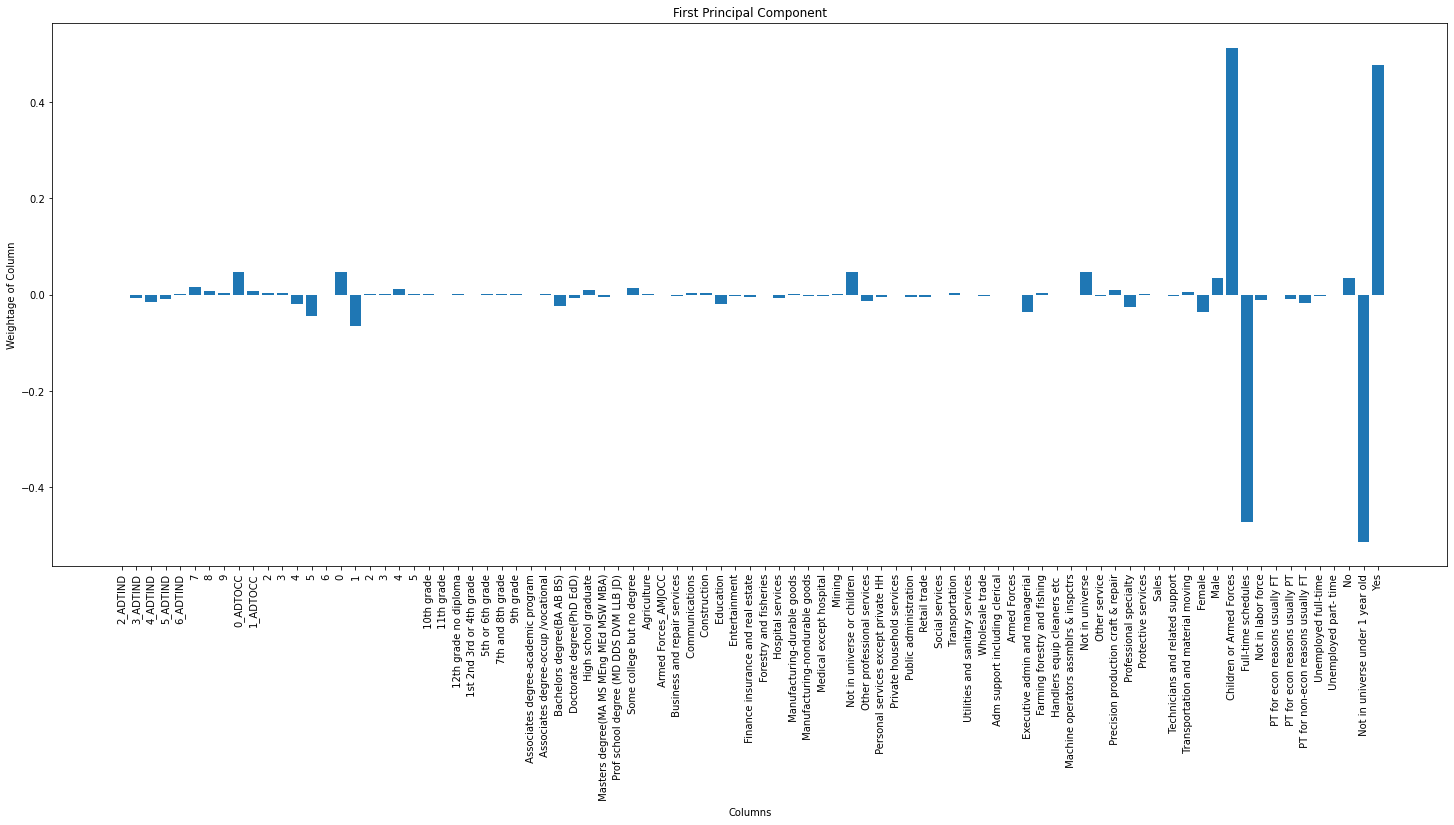

In [ ]:
# Plotting 1st principal component for PCA for population dataset
c1_m1 = pca_m1.components_[0]


plt.figure(figsize=(25, 10))
plt.bar(list(range(len(c1_m1))), c1_m1)
plt.title("First Principal Component")
plt.xticks(list(range(len(c1_m1))), mored3.columns, rotation='vertical')
plt.xlabel('Columns')
plt.ylabel('Weightage of Column')
plt.show()



In [ ]:
cols_m = sorted(zip(c1_m1, mored3.columns), reverse=True)[:3]
cols_m

[(0.5133654269679171, ' Children or Armed Forces'),
 (0.4769453605700953, ' Yes'),
 (0.04762956360660295, '0_ADTOCC')]

In [ ]:
cols_p = sorted(zip(c1_p1, popd3.columns), reverse=True)[:3]
cols_p

[(0.304533364639667, ' Nonfiler'),
 (0.292584552095164, ' Never married'),
 (0.28647106018959745, ' Child under 18 never married')]

In [ ]:
print(cent_m_9[list(mored3.columns).index('0_ADTOCC')])
print(cent_m_9[list(mored3.columns).index(' Children or Armed Forces')])
print(cent_m_9[list(mored3.columns).index(' Yes')])


print(cent_m_15[list(mored3.columns).index('0_ADTOCC')])
print(cent_m_15[list(mored3.columns).index(' Children or Armed Forces')])
print(cent_m_15[list(mored3.columns).index(' Yes')])

-0.01412057911828131
-0.025812822865021845
-0.019722690940121468
-0.011825265225512499
-0.04225052747874741
0.015147865638000968


In [ ]:
print(cent_p_2[list(popd3.columns).index(' Nonfiler')])
print(cent_p_2[list(popd3.columns).index(' Never married')])
print(cent_p_2[list(popd3.columns).index(' Child under 18 never married')])

print(cent_p_13[list(popd3.columns).index(' Nonfiler')])
print(cent_p_13[list(popd3.columns).index(' Never married')])
print(cent_p_13[list(popd3.columns).index(' Child under 18 never married')])

1.0077403067690933
1.0365323285011432
1.0500213369286593
1.0069728875220072
0.9982745913398192
1.0225425792756258
